# Grouping and reshaping data

We're going to look at some different ways of grouping and aggregating data. We're building towards thinking about 'split', 'apply', and 'combine workflows, which look something like this:

![split-apply-combine](https://github.com/core-skills/02-getting-to-know-the-tools/blob/master/notebooks/split-apply-combine.png?raw=true)

(taken from Jake VanderPlas' excellent [Python data science handbook](https://github.com/jakevdp/PythonDataScienceHandbook) - check out all the notebooks available on github if you want more in-depth examples than what we've worked through today).

## Groupby

Find the pandas `groupby` method and work out how it works on your dataframe. Hint: try passing a categorical column from your data. 

If you don't have a categorical column but you do have a column of numbers, you can generate groups by binning the data into seperate bins using the `pandas.cut` function - something like this:

```python
import pandas
from numpy import inf
from random_data import random_dataframe

# Our faithful bogus dataframe
df = random_dataframe(30)

# Add a new column which bins the a values
df['how_big'] = pandas.cut(df.a, 
                           bins=[-inf, 50, inf],
                           labels=('low', 'high'))
```

`pandas.cut` can often be useful for investigating subsets of numerical data (e.g. ore grade in marginal blocks!).

In [2]:
import pandas
from numpy import inf
from random_data import random_dataframe

# Our faithful bogus dataframe
df = random_dataframe(30)

# Add a new column which bins the a values
df['how_big'] = pandas.cut(df.a, 
                           bins=[-inf, 50, inf],
                           labels=('low', 'high'))


In [3]:
df.describe()

,a,b
count,30.000000,30.000000
mean,50.718158,0.493505
std,28.136770,0.280745
min,-6.848270,0.032494
25%,31.961008,0.314496
50%,45.862435,0.454891
75%,71.602663,0.700820
max,106.972677,0.988642


In [4]:
df


,category,a,b,how_big
0,z,106.211234,0.794245,high
1,x,39.141346,0.649092,low
2,z,83.081434,0.407790,high
3,y,15.013635,0.550650,low
4,x,42.593621,0.434098,low
5,z,90.284977,0.340271,high
6,z,33.197417,0.678287,low
7,z,29.205157,0.988642,low
8,y,106.972677,0.333951,high
9,z,32.364123,0.032494,low


Next try to generate some summary statistics about each of your groups. The `info` and `describe` methods of the pandas dataframe are good places to start - try something like this:

```python
from random_data import random_dataframe

# Yet more bogus data
df = random_dataframe(100)

# Iterating in a for-loop
for category, grp_df in df.groupby('category'):
    print(f"\nInfo for group {category}")
    print(grp_df.describe())
```

In [5]:
for category, subset in df.groupby('category'):
    print(category,subset.describe())
    #print(category,subset.mean())  - or sum or min etc etc

x                a         b
count   8.000000  8.000000
mean   51.172832  0.469557
std    16.986627  0.278152
min    22.917572  0.066709
25%    41.730552  0.362111
50%    49.185163  0.454891
75%    66.589382  0.621113
max    71.730342  0.938838
y                 a         b
count    7.000000  7.000000
mean    52.683289  0.596355
std     39.202328  0.231980
min     -6.848270  0.311554
25%     26.591745  0.442301
50%     71.219625  0.578000
75%     72.127752  0.712637
max    106.972677  0.975058
z                 a          b
count   15.000000  15.000000
mean    49.558604   0.458281
std     28.870460   0.307524
min     11.632489   0.032494
25%     30.515896   0.214704
50%     41.648412   0.372949
75%     70.147626   0.732721
max    106.211234   0.988642


In [6]:
#or can be done by
df.groupby('category').mean()

,a,b
category,,
x,51.172832,0.469557
y,52.683289,0.596355
z,49.558604,0.458281


In [7]:
df.groupby('category').mean()

,a,b
category,,
x,51.172832,0.469557
y,52.683289,0.596355
z,49.558604,0.458281


You don't have to iterate over the groups if you don't want to - you can pipeline them to an aggregating function directly (which is often easier to read).

```python
# Calculating an aggregation directly
df.groupby('category').sum()
```

Try looking at some of the other pandas aggregations: `count`, `first`, `last`, `mean`, `median`, `min`, `max`, `std`, `var`, `mad`, `prod`, `sum`. What do each of these do?

Take a look at some of the more advanced group options - for example you can set a category as an index, and pass functions which take an index and output a group.

```python
# Calculating an aggregation by specifying a mapping 
# from index to group
mapping = {'x': 'first', 'y': 'first', 'z': 'second'}
df.set_index('category').groupby(mapping).mean()
```

How might you write a small function to start to aggregate or summarize the data in your data's groups in more complex ways?

## Pivot table

Pivot tables are a lot like groupby operations but instead of ending up with one column of groups we can end up with multidimensional arrays of aggregations. 

In the diagram at the top of the page, you can think of a pivot table splitting the data using more than one column in the 'split' step.

This is generally more useful when we want to start to aggregate along multiple dimensions.

Using our example from above:

```python
import pandas
from numpy import inf
from random_data import random_dataframe

# Our faithful bogus dataframe
df = random_dataframe(3000, categories='uvwxyz')

# Add a new column which bins the a values
df['how_big'] = pandas.cut(df.a, 
                           bins=[-inf, 50, inf],
                           labels=('low', 'high'))

# make a new pivot table that calculates the mean for each
# of our subcategories - both 'x,y,z' and 'low' and 'high'
pivot = df.pivot_table('b', index='category', columns='how_big', aggfunc='mean')
```

Try creating a pivot table on your own data (as before you can use `pandas.cut` to bin numerical data if that's more useful).

In [8]:
import pandas
from numpy import inf
from random_data import random_dataframe

# Our faithful bogus dataframe
df = random_dataframe(3000, categories='uvwxyz')

# Add a new column which bins the a values
df['how_big'] = pandas.cut(df.a, 
                           bins=[-inf, 25, 50, 75, inf],
                           labels=('tiny', 'small', 'medium' 'large', 'huge'))

# make a new pivot table that calculates the mean for each
# of our subcategories - both 'x,y,z' and 'low' and 'high'
pivot = df.pivot_table('b', index='category', columns='how_big', aggfunc='sum')

In [9]:
df.groupby('how_big').count()

,category,a,b
how_big,,,
tiny,786,786,786
small,726,726,726
mediumlarge,727,727,727
huge,761,761,761


In [10]:
pivot


how_big,tiny,small,mediumlarge,huge
category,,,,
u,54.181729,69.538995,65.135903,59.294058
v,71.842206,64.363029,55.029520,55.960841
w,55.287085,53.684491,69.031669,60.461321
x,54.187167,53.301602,63.586366,71.737469
y,72.243753,82.208401,50.568297,70.111568
z,60.737224,64.822333,53.374973,56.788990


## Plotting data

Next we're going to use [seaborn](seaborn.pydata.org) to generate some pretty plots of our data. 

Most Python tutorials will introduce [matplotlib](https://matplotlib.org) at this stage because it's the default but seaborn is a much higher-level library with a nicer API, especially for exploratory vis (matplotlib will probably make more sense to you if you're coming from MATLAB world though). The only hangover is that we need to include the `%matplotlib inline` cell magic to tell Jupyter to render the graphics inline for us. 

We'll start by looking at our random dataset.  

In [11]:
%matplotlib inline
import seaborn
seaborn.set()

from random_data import random_dataframe

# Set up our dataframe and pivot table
df = random_dataframe(3000, categories='uvwxyz')
df['how_big'] = pandas.cut(df.a, 
                           bins=[-inf, 25, 50, 75, inf],
                           labels=('tiny', 'small', 'medium' 'large', 'huge'))
df.head()

,category,a,b,how_big
0,x,48.967710,0.109535,small
1,x,-2.194792,0.595482,tiny
2,z,2.649327,0.589296,tiny
3,z,12.090489,0.593017,tiny
4,z,95.308350,0.922458,huge


For one-dimensional dataset we can try `seaborn.distplot`, `seaborn.kdeplot` and `seaborn.rugplot` to visualize the data.

C:\Users\carlie.byrne\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


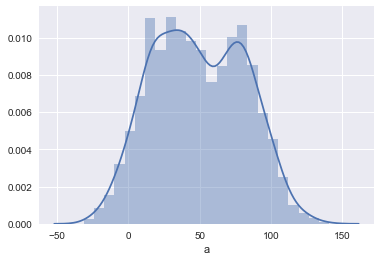

In [12]:
seaborn.distplot(df.a)
#take a column of data and turn into distribution

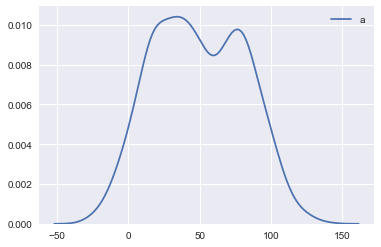

In [13]:
seaborn.kdeplot(df.a)
#kernel density

We can also use `jointplot` to generate a scatter and histograms of sets of data

C:\Users\carlie.byrne\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\carlie.byrne\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


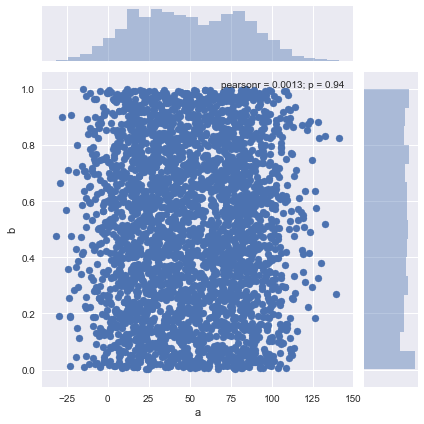

In [14]:
seaborn.jointplot('a', 'b', df)

C:\Users\carlie.byrne\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\carlie.byrne\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


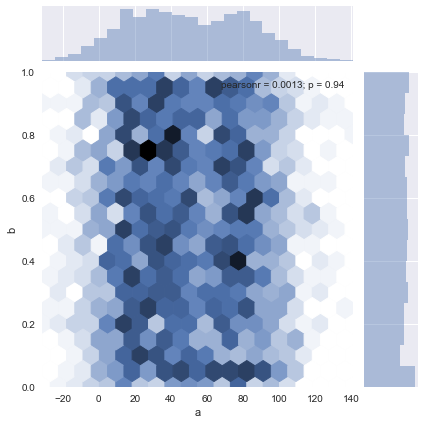

In [15]:
seaborn.jointplot('a', 'b', df, kind='hex')

For times when you want 'plot everything against everything else' you can do something like

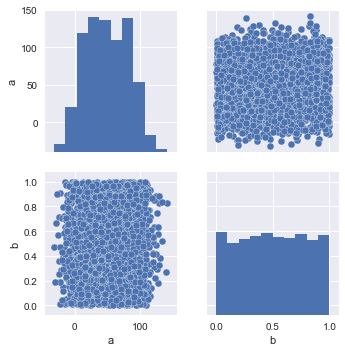

In [16]:
seaborn.pairplot(df)

This is really useful for pulling out relationships between variables

In [17]:
df['c'] = df.a + df.b * df.a
df['d'] = df.c * df.b + df.a

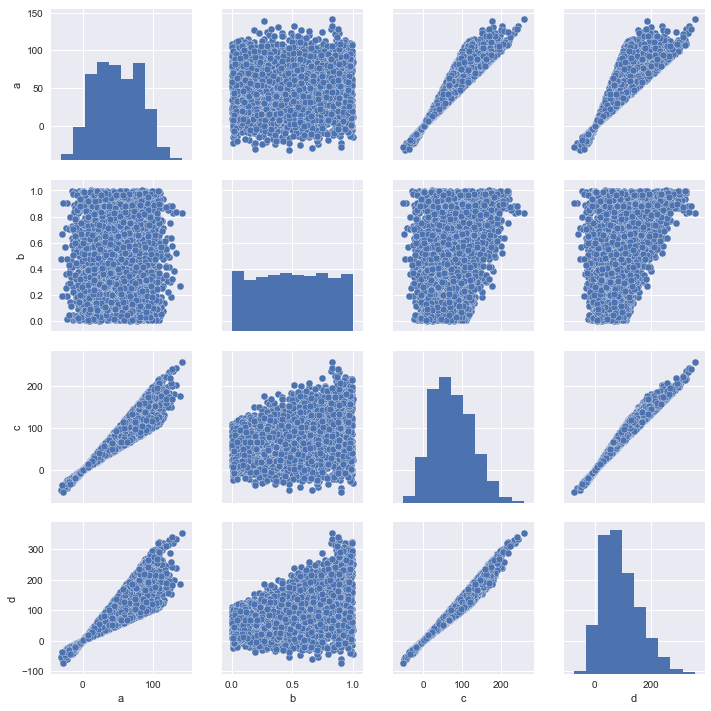

In [18]:
seaborn.pairplot(df)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\carlie.byrne\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\carlie.byrne\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\carlie.byrne\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\carlie.byrne\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\carlie.byrne\AppData\Local\Continuum\anaconda3\lib\site-packages\matplo

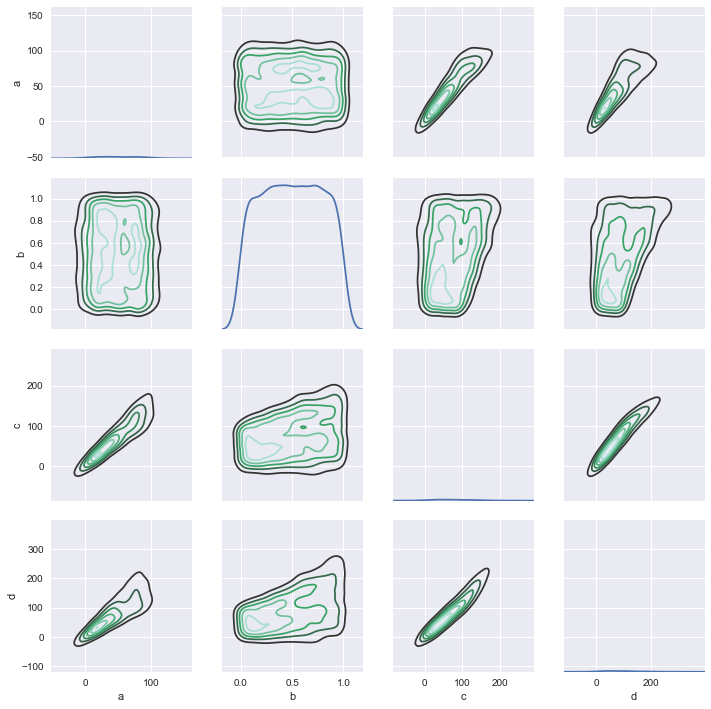

In [19]:
g = seaborn.PairGrid(df)
g.map_diag(seaborn.kdeplot)
g.map_offdiag(seaborn.kdeplot, n_levels=6);

TypeError: cannot perform reduce with flexible type

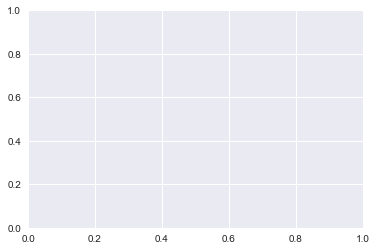

In [26]:
seaborn.boxplot(df)

Seaborn also has a heap of support for categorical data. We can also include more dimensions in the visualization by specifying further dimensions as colors or point size

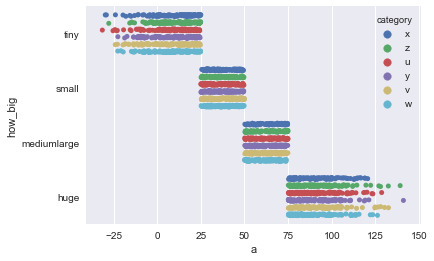

In [20]:
seaborn.stripplot('a', 'how_big', hue='category', data=df, jitter=True, dodge=True)

We can also visualize the pivot table we generated above with heatmaps. 

In [21]:
pivot = df.pivot_table('b', index='category', columns='how_big', aggfunc='sum')
pivot

how_big,tiny,small,mediumlarge,huge
category,,,,
u,77.458916,60.668418,70.832273,50.163710
v,64.679219,64.769495,67.418889,56.425502
w,67.993542,56.511587,67.581678,58.114257
x,56.134545,63.997774,53.419894,49.447374
y,67.389476,69.381547,66.495832,61.792341
z,66.892901,71.221645,60.364060,50.639914


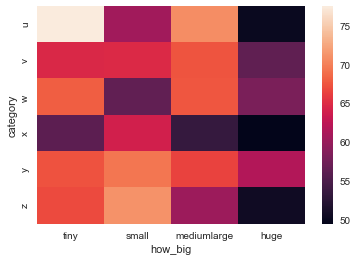

In [22]:
seaborn.heatmap(pivot)

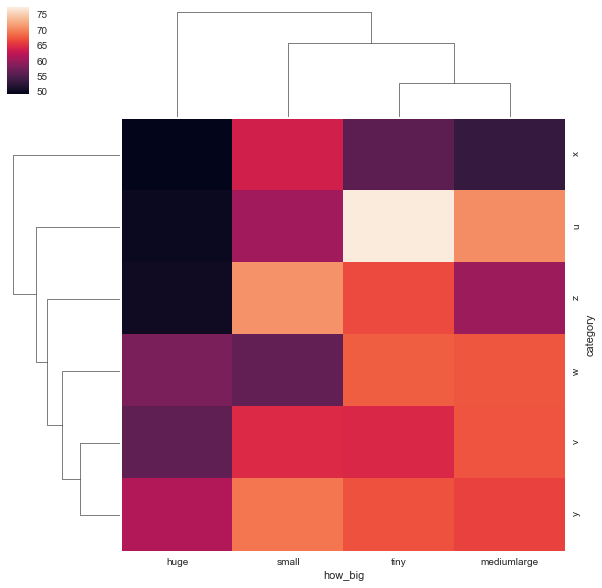

In [23]:
seaborn.clustermap(pivot)

Seaborn can get a lot more complicated than this and it's worth digging through the examples to find useful ways of slicing and dicing your dataframes into pictures.

Now try this out on your own dataset!